# Proyecto final #1: Pre-procesamiento

**Autores:**
*   Jorge Sebastián Arroyo Estrada CC. 1193482707
*   Daniel Felipe Yépez Taimal CC. 1004193180

**Procesamiento Digital de Imágenes**

**Facultad de Ingeniería**

**Universidad de Antioquia**

---

## Librerías

In [1]:
from pathlib import Path

import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageFilter

In [11]:
# Para 4 imágenes (2 podridas, 2 frescas)

# Leer imagen
# Aceptar o rechazar imagen (por resolución)
# Recortar imagen
# Normalizar imagen
# Aplicar filtro Gaussiano

# Mostrar la imagen original vs la gris vs la filtrada

In [2]:
def read_image(image_path: Path) -> np.ndarray:
    """Lee una imagen desde la ruta dada y devuelve un array de numpy."""
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"La imagen con ruta {image_path} no se pudo leer.")
    return image


def get_image_resolution(image: np.ndarray):
    """Obtiene la resolución de una imagen dada como array de numpy."""
    height, width = image.shape[:2]
    return width, height


def collect_resolutions(folder_path: Path):
    """Recopila resoluciones y rutas de las imágenes en la carpeta dada."""
    resolutions = []
    image_paths = []

    for file_path in folder_path.iterdir():
        if file_path.is_file() and file_path.suffix.lower() in {
            ".png",
            ".jpg",
            ".jpeg",
        }:
            try:
                image = read_image(file_path)
                resolution = get_image_resolution(image)
                resolutions.append(resolution)
                image_paths.append(str(file_path))
            except ValueError as e:
                print(e)
                continue

    return resolutions, image_paths


def calculate_min_max_resolutions(
    resolutions: list[tuple[int, int]], image_paths: list[str]
):
    """Calcula la resolución mínima y máxima a partir de la lista de resoluciones y sus rutas."""
    resolutions_array = np.array(resolutions)
    widths, heights = resolutions_array[:, 0], resolutions_array[:, 1]

    min_idx = np.argmin(widths * heights)
    max_idx = np.argmax(widths * heights)

    min_resolution = resolutions[min_idx]
    max_resolution = resolutions[max_idx]
    min_image_path = image_paths[min_idx]
    max_image_path = image_paths[max_idx]

    return min_resolution, min_image_path, max_resolution, max_image_path


def calculate_average_resolution(resolutions: list[tuple[int, int]]):
    """Calcula la resolución promedio a partir de la lista de resoluciones."""
    resolutions_array = np.array(resolutions)
    avg_width = np.mean(resolutions_array[:, 0])
    avg_height = np.mean(resolutions_array[:, 1])
    return int(avg_width), int(avg_height)


def calculate_std_resolution(resolutions: list[tuple[int, int]]):
    """Calcula la desviación estándar de las resoluciones."""
    resolutions_array = np.array(resolutions)
    std_width = np.std(resolutions_array[:, 0])
    std_height = np.std(resolutions_array[:, 1])
    return std_width, std_height


def calculate_resolutions(folder_path: Path):
    """Calcula las resoluciones mínima, máxima y promedio de las imágenes en una carpeta."""
    resolutions, image_paths = collect_resolutions(folder_path)
    weight = len(resolutions)
    min_resolution, min_image_path, max_resolution, max_image_path = (
        calculate_min_max_resolutions(resolutions, image_paths)
    )
    avg_resolution = calculate_average_resolution(resolutions)
    std_resolution = calculate_std_resolution(resolutions)
    return (
        min_resolution,
        min_image_path,
        max_resolution,
        max_image_path,
        avg_resolution,
        std_resolution,
        weight,
    )

In [3]:
DB_PATH = Path("../database")

# Arreglos para almacenar los valores deseados de cada etiqueta
min_resolutions = []
max_resolutions = []
min_image_paths = []
max_image_paths = []
avg_resolutions = []
std_resolutions = []
weights_per_tag = []

for fruit_tag in DB_PATH.iterdir():
    if fruit_tag.is_dir():
        print(f"Procesando carpeta: {fruit_tag}")
        (
            min_resolution,
            min_image_path,
            max_resolution,
            max_image_path,
            avg_resolution,
            std_resolution,
            weight,
        ) = calculate_resolutions(fruit_tag)

        # Muestra las resoluciones mínima y máxima junto con sus rutas
        print(f"Resolución mínima: {min_resolution[0]}×{min_resolution[1]}")
        print(f"Ruta de la imagen con la mínima resolución: {min_image_path}")
        print(f"Resolución máxima: {max_resolution[0]}×{max_resolution[1]}")
        print(f"Ruta de la imagen con la máxima resolución: {max_image_path}")
        print(f"Resolución promedio: {avg_resolution[0]}×{avg_resolution[1]}")
        print(
            f"Desviación estándar de la resolución: {std_resolution[0]:.0f}×{std_resolution[1]:.0f}\n"
        )

        # Almacena las resoluciones y las rutas hacia los mínimos y máximos
        min_resolutions.append(min_resolution)
        max_resolutions.append(max_resolution)
        min_image_paths.append(min_image_path)
        max_image_paths.append(max_image_path)
        avg_resolutions.append(avg_resolution)
        std_resolutions.append(std_resolution)
        weights_per_tag.append(weight)

Procesando carpeta: ..\database\fresh_apple
Resolución mínima: 150×142
Ruta de la imagen con la mínima resolución: ..\database\fresh_apple\rotated_by_45_Screen Shot 2018-06-08 at 5.28.42 PM.png
Resolución máxima: 584×510
Ruta de la imagen con la máxima resolución: ..\database\fresh_apple\rotated_by_60_Screen Shot 2018-06-08 at 5.11.24 PM.png
Resolución promedio: 356×355
Desviación estándar de la resolución: 92×94

Procesando carpeta: ..\database\fresh_banana
Resolución mínima: 174×146
Ruta de la imagen con la mínima resolución: ..\database\fresh_banana\rotated_by_30_Screen Shot 2018-06-12 at 9.59.02 PM.png
Resolución máxima: 840×440
Ruta de la imagen con la máxima resolución: ..\database\fresh_banana\rotated_by_15_Screen Shot 2018-06-12 at 10.00.49 PM.png
Resolución promedio: 519×380
Desviación estándar de la resolución: 135×76

Procesando carpeta: ..\database\fresh_orange
Resolución mínima: 154×140
Ruta de la imagen con la mínima resolución: ..\database\fresh_orange\rotated_by_30_Scre

In [4]:
# Computar el producto para la resolución de cada imagen
min_products = [w * h for w, h in min_resolutions]
max_products = [w * h for w, h in max_resolutions]

# Encontrar el producto mínimo y máximo y sus índices
min_product = min(min_products)
max_product = max(max_products)
min_index = min_products.index(min_product)
max_index = max_products.index(max_product)

# Obtener las resoluciones de éstos índices
min_resolution = min_resolutions[min_index]
max_resolution = max_resolutions[max_index]

# Calcular peso total
total_weight = np.sum(weights_per_tag)

# Calcular el promedio
weighted_avg = [
    np.array(res) * weight for (res), weight in zip(avg_resolutions, weights_per_tag)
]
avg_resolution = tuple(map(int, np.sum(weighted_avg, axis=0) / total_weight))

# Calcular la desviación estándar
weighted_std = [
    np.array(res) * weight for (res), weight in zip(std_resolutions, weights_per_tag)
]
std_resolution = tuple(map(int, np.sum(weighted_std, axis=0) / total_weight))

In [5]:
min_image_path = min_image_paths[min_index]
max_image_path = max_image_paths[max_index]

print(f"Resolución mínima global: {min_resolution[0]}×{min_resolution[1]}")
print(f"Ruta de la imagen con la mínima resolución: {min_image_path}")
print(f"Resolución máxima: {max_resolution[0]}×{max_resolution[1]}")
print(f"Ruta de la imagen con la máxima resolución: {max_image_path}")
print(f"Resolución promedio: {avg_resolution[0]}×{avg_resolution[1]}")
print(f"Desviación estándar de la resolución: {std_resolution[0]}×{std_resolution[1]}")
print("Resoluciones aceptadas:")
lower_bound = np.array(avg_resolution) - 2.25 * np.array(std_resolution)
higher_bound = np.array(avg_resolution) + 2.25 * np.array(std_resolution)
print(f"{lower_bound[0]} < ancho < {higher_bound[0]}")
print(f"{lower_bound[1]} < alto < {higher_bound[1]}")

Resolución mínima global: 146×116
Ruta de la imagen con la mínima resolución: ..\database\stale_orange\rotated_by_15_Screen Shot 2018-06-12 at 11.46.10 PM.png
Resolución máxima: 766×494
Ruta de la imagen con la máxima resolución: ..\database\stale_banana\translation_Screen Shot 2018-06-12 at 9.11.00 PM.png
Resolución promedio: 443×392
Desviación estándar de la resolución: 78×54
Resoluciones aceptadas:
267.5 < ancho < 618.5
270.5 < alto < 513.5


In [6]:
def is_valid_resolution(image, avg_res, std_res):
    res = image.size[:2]
    return (
        abs(res[0] - avg_res[0]) <= 2.25 * std_res[0]
        and abs(res[1] - avg_res[1]) <= 2.25 * std_res[1]
    )


def is_valid_extension(file_name):
    valid_extensions = ["jpg", "jpeg", "png"]
    return file_name.lower().endswith(tuple(valid_extensions))


def resize_image(img, size):
    return img.resize(size)


def filter_by_resolution(db_path, new_db_path, avg_resolution, std_resolution, size):
    skipped_images = 0
    db_path = Path(db_path)
    new_db_path = Path(new_db_path)

    for fruit_tag in db_path.iterdir():
        if fruit_tag.is_dir():
            print(f"Actualmente trabajando en {fruit_tag}")
            for image in fruit_tag.iterdir():
                image_path = image

                # Verificar la extensión del archivo
                if not is_valid_extension(str(image)):
                    print(f"Archivo ignorado (extensión no válida): {image_path}")
                    skipped_images += 1
                    continue

                try:
                    with Image.open(image_path) as img:
                        if is_valid_resolution(img, avg_resolution, std_resolution):
                            img_resized = resize_image(img, size)  # Cambio de tamaño
                            folder_output_path = new_db_path / fruit_tag.name
                            folder_output_path.mkdir(parents=True, exist_ok=True)
                            output_path = folder_output_path / image.name
                            img_resized.save(output_path)
                        else:
                            skipped_images += 1
                except Exception as e:
                    print(f"No se pudo procesar {image_path} debido a {e}")
                    skipped_images += 1

    print(f"Se omitieron {skipped_images} imágenes de la base de datos original")


def preprocess(img, avg_res, std_res):
    # Escala de grises
    img_gray = img.convert("L")
    # Filtro Gaussiano
    img_filtered = img_gray.filter(ImageFilter.GaussianBlur(radius=2))
    # Thresholding
    _, img_thresholded = cv2.threshold(
        np.array(img_filtered), 128, 255, cv2.THRESH_BINARY
    )

    _, img_otsu = cv2.threshold(
        np.array(img_filtered), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU
    )

    return (img_gray, img_filtered, img_thresholded, img_otsu)


def show_preprocessed_images(img, img_gray, img_filtered, img_thresholded):
    plt.figure(figsize=(12, 12), layout="tight")
    images = [img, img_gray, img_filtered, img_thresholded]
    images = [img, img_gray, img_filtered, img_thresholded]
    titles = ["Original", "Escala de grises", "Filtrada", "Umbralizada"]

    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(2, 2, i + 1)
        if i == 0:
            plt.imshow(img)
        else:
            plt.imshow(img, cmap="gray")
        plt.title(title, fontsize=18)
        plt.axis("off")

In [7]:
OLD_DB_PATH = Path("../database/")
NEW_DB_PATH64 = Path("./preprocessed_db64/")
NEW_DB_PATH128 = Path("./preprocessed_db128/")

size64 = (64, 64)
size128 = (128, 128)

filter_by_resolution(OLD_DB_PATH, NEW_DB_PATH64, avg_resolution, std_resolution, size64)
filter_by_resolution(
    OLD_DB_PATH, NEW_DB_PATH128, avg_resolution, std_resolution, size128
)

Actualmente trabajando en ..\database\fresh_apple
Actualmente trabajando en ..\database\fresh_banana
Actualmente trabajando en ..\database\fresh_orange
Actualmente trabajando en ..\database\fresh_tomato
Actualmente trabajando en ..\database\stale_apple
Actualmente trabajando en ..\database\stale_banana
Actualmente trabajando en ..\database\stale_orange
Actualmente trabajando en ..\database\stale_tomato
Archivo ignorado (extensión no válida): ..\database\stale_tomato\Copy of IMG_20200730_170235.jpg_0_6762 - Acceso directo.lnk
Archivo ignorado (extensión no válida): ..\database\stale_tomato\Copy of IMG_20200730_170235.jpg_0_6883 - Acceso directo.lnk
Archivo ignorado (extensión no válida): ..\database\stale_tomato\Copy of IMG_20200730_170244.jpg_0_7685 - Acceso directo.lnk
Archivo ignorado (extensión no válida): ..\database\stale_tomato\Copy of IMG_20200730_170244.jpg_0_7905 - Acceso directo.lnk
Archivo ignorado (extensión no válida): ..\database\stale_tomato\Copy of IMG_20200730_170244.j

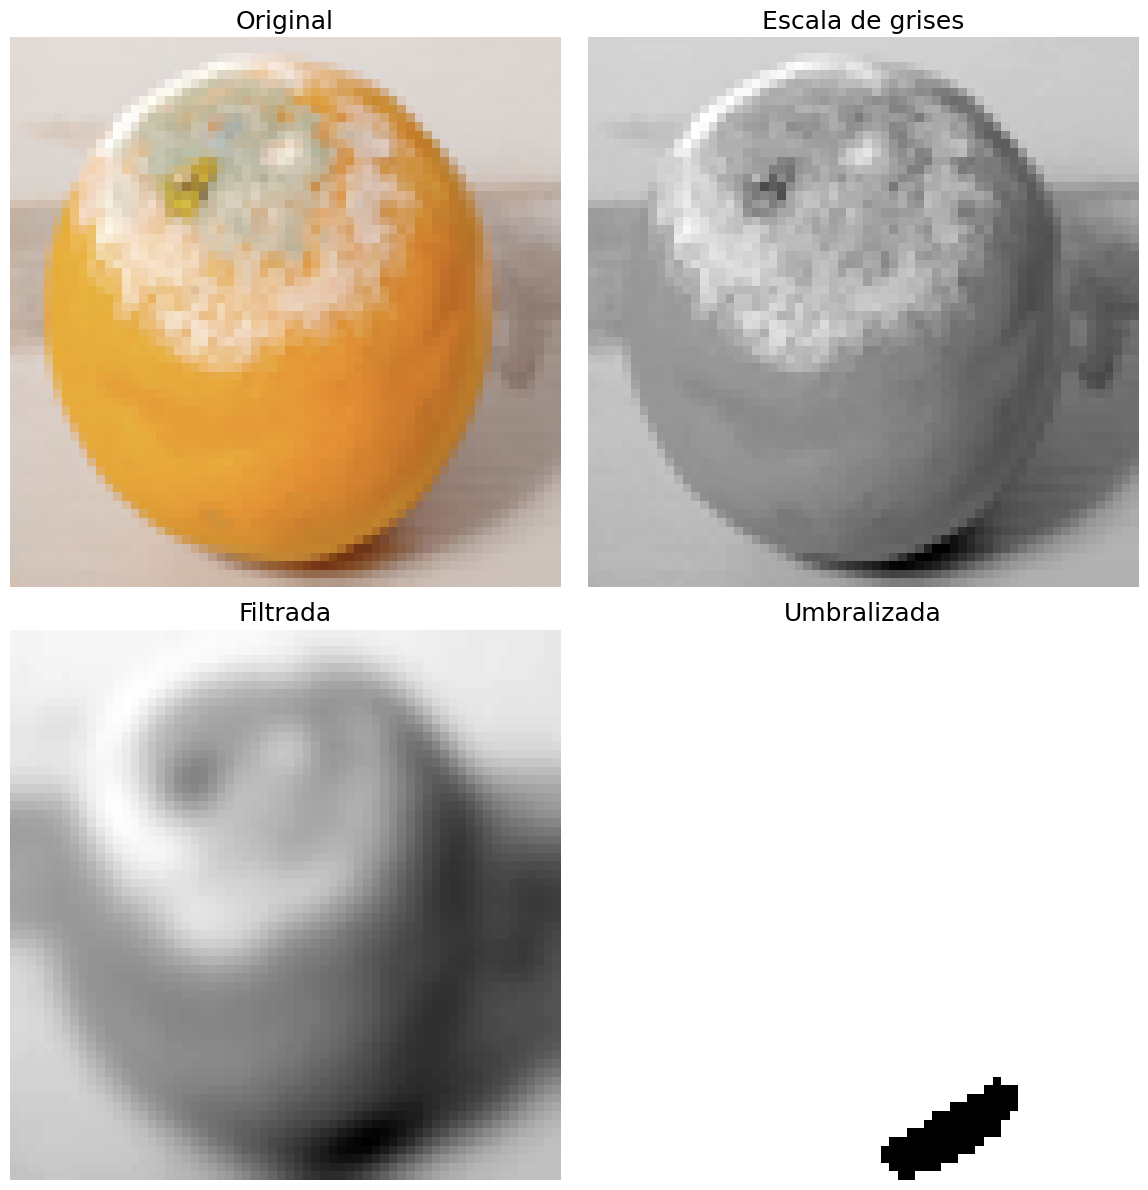

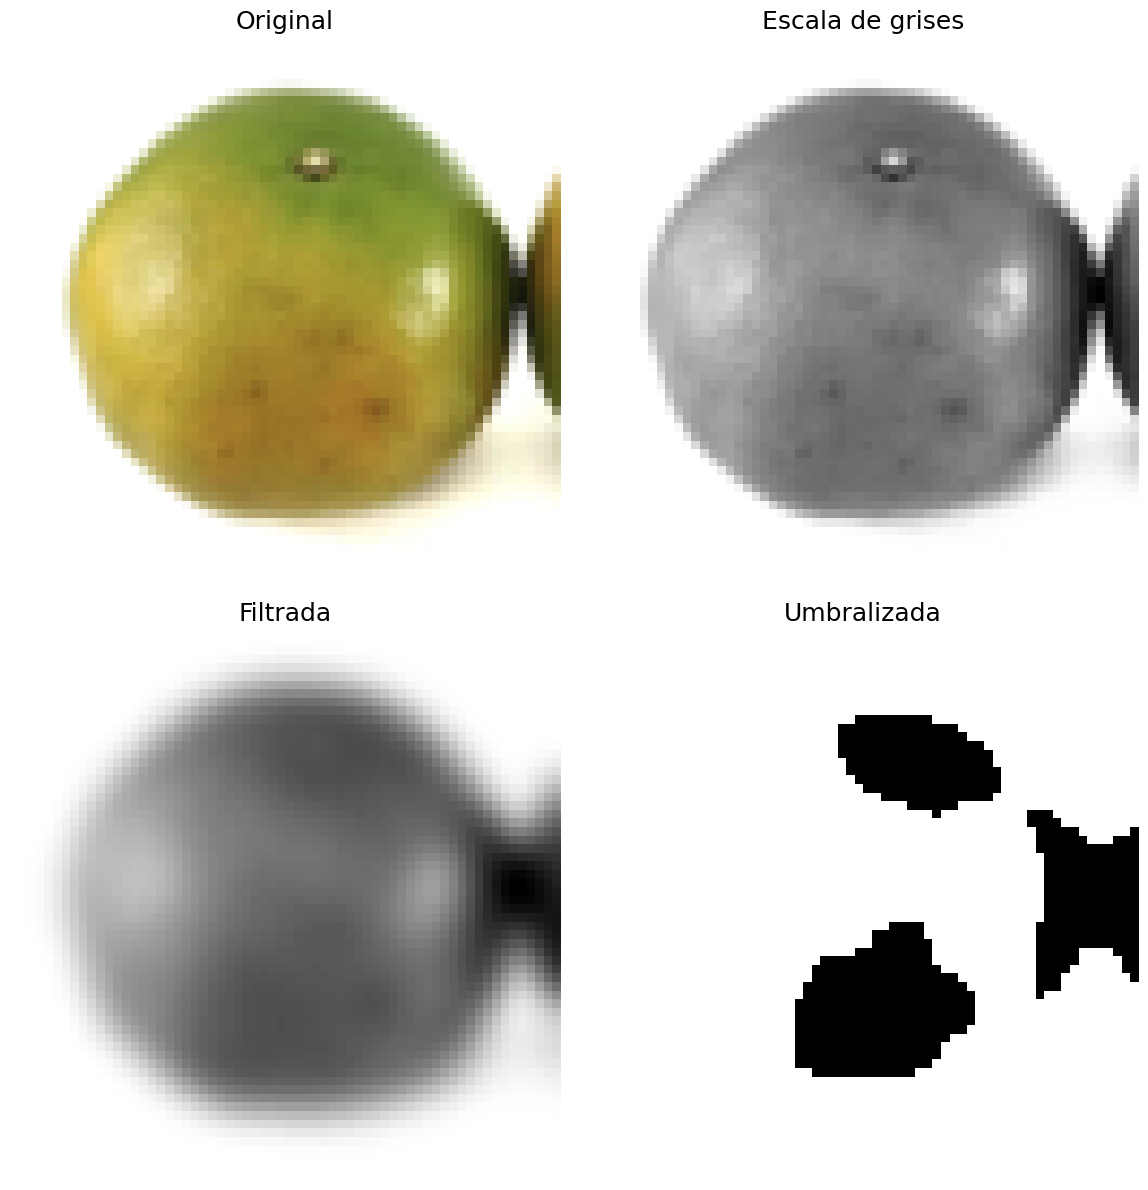

In [8]:
example_image_paths = [
    NEW_DB_PATH64 / "stale_orange/Screen Shot 2018-06-12 at 11.38.34 PM.png",
    NEW_DB_PATH64 / "fresh_orange/Screen Shot 2018-06-13 at 12.20.25 AM.png",
]

for path in example_image_paths:
    img = Image.open(path)
    img_gray, img_filtered, img_thresholded, otsu = preprocess(
        img, avg_resolution, std_resolution
    )

    otsu_flag = False
    # otsu_flag = True

    images = [
        img,
        img_gray,
        img_filtered,
        otsu if otsu_flag else img_thresholded,
    ]
    show_preprocessed_images(*images)